In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [174]:
url = 'C:/Users/felip/Desktop/Projetos/Fraud Analytics/creditcard.csv'
df_fraud = pd.read_csv(url)
df_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [175]:
print('Checking if there are null values in the dataset')
df_fraud.isna().sum()

Checking if there are null values in the dataset


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [176]:
print('% of fraud in dataset in relation to non-fraud')
count_fraud = df_fraud['Class'].value_counts(normalize=True)
print(f'Non-Fraud: {round(count_fraud[0]*100,2)}% | Fraud: {round(count_fraud[1]*100,3)}%')

% of fraud in dataset in relation to non-fraud
Non-Fraud: 99.83% | Fraud: 0.173%


In [177]:
df_fraud.drop(['Time','Amount'], axis=1).columns.to_list()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class']

In [178]:
def configs_to_plot(title='', x_axis='', y_axis=''):
    sns.set_style('darkgrid')
    figure(figsize=(8, 5), dpi=100)
    plt.title(f'{title}',fontsize=14)
    plt.xlabel(f'{x_axis}',fontsize=14)
    plt.ylabel(f'{y_axis}',fontsize=14)
    plt.xticks(fontsize=14, rotation = 75)
    plt.yticks(fontsize=14)

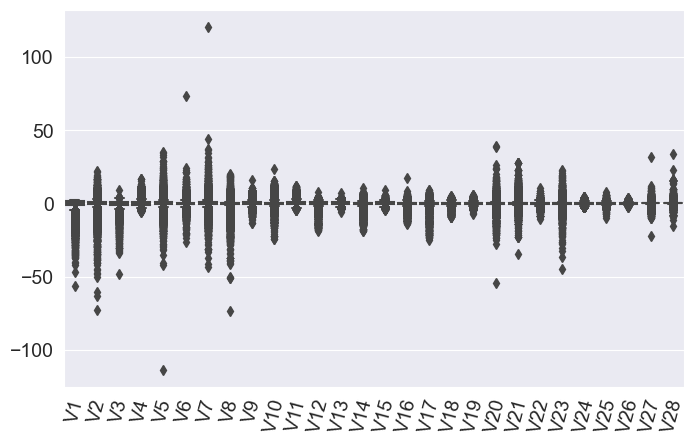

In [179]:
configs_to_plot()
sns.boxplot(data=df_fraud.drop(['Time','Amount','Class'], axis=1));

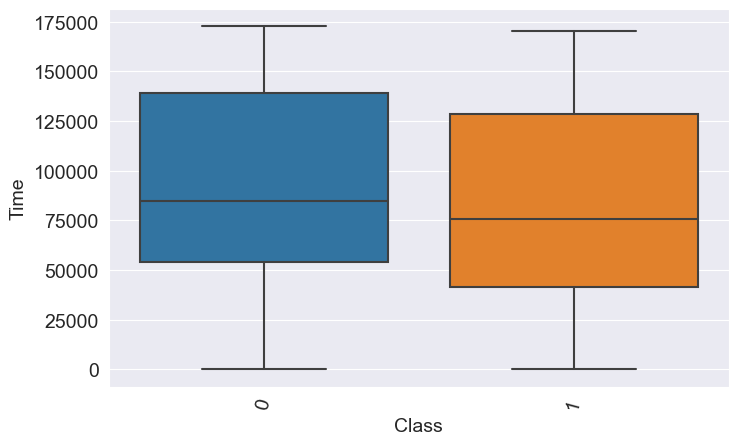

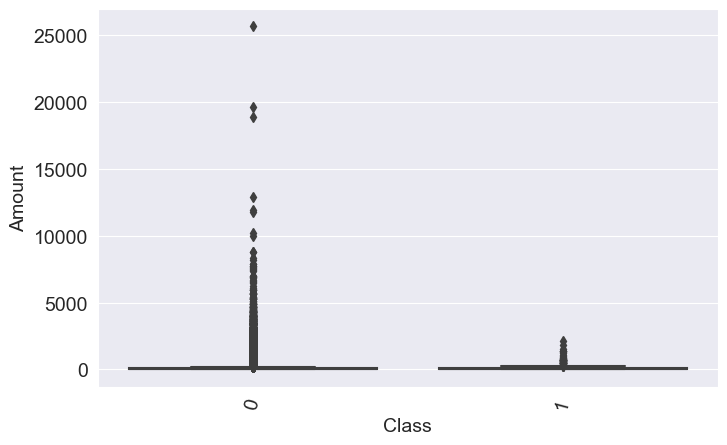

In [180]:
configs_to_plot()
sns.boxplot(x='Class', y='Time', data=df_fraud)
plt.show()
configs_to_plot()
sns.boxplot(x='Class', y='Amount', data=df_fraud);
plt.show()

In [181]:
fraud = df_fraud[df_fraud['Class']==1]
non_fraud = df_fraud[df_fraud['Class']!=1].sample(len(fraud))

df = pd.concat([fraud,non_fraud])

In [182]:
y = df['Class']
x = df.drop('Class',axis=1)

print('Total data:',len(x),'samples')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.10)

print('Data for train:',len(x_train),'samples')
print('Data for test:',len(x_test),'samples')
print('Data for validation:',len(x_val),'samples')

Total data: 984 samples
Data for train: 688 samples
Data for test: 266 samples
Data for validation: 30 samples


In [183]:
estimator = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=2500, random_state=1234)
estimator.fit(x_train,y_train)

[20:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2500, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
estimator.score(x_test,y_test)

0.9473684210526315

In [123]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.237571,-0.205521,0.129668,-0.180796,0.265874,0.092804,0.199444,-0.140152,0.148089,...,-0.055504,0.152553,0.043218,-0.027657,-0.193792,-0.058382,-0.140545,0.008323,0.008494,-0.114609
V1,0.237571,1.000000,-0.822220,0.884067,-0.624558,0.866330,0.329714,0.887731,-0.081581,0.667012,...,0.011525,-0.049918,-0.057074,-0.065228,-0.077465,0.063193,0.187073,0.199482,-0.036656,-0.452404
V2,-0.205521,-0.822220,1.000000,-0.869642,0.698577,-0.804628,-0.308117,-0.857953,-0.022705,-0.705170,...,0.043785,-0.004211,0.122814,0.003813,0.099788,-0.018797,-0.164531,0.016192,-0.211264,0.498907
V3,0.129668,0.884067,-0.869642,1.000000,-0.771319,0.852641,0.465528,0.891206,-0.170821,0.761963,...,0.023735,-0.070935,-0.025330,0.004387,-0.088563,-0.003143,0.106637,0.134992,-0.010533,-0.563892
V4,-0.180796,-0.624558,0.698577,-0.771319,1.000000,-0.585584,-0.448813,-0.711790,0.100972,-0.782768,...,-0.013578,0.126999,0.018581,-0.077693,-0.003804,0.130773,-0.013822,-0.072109,0.001979,0.714965
V5,0.265874,0.866330,-0.804628,0.852641,-0.585584,1.000000,0.316776,0.845071,-0.206502,0.665743,...,0.038688,-0.097418,-0.089620,-0.109035,-0.092365,0.051436,0.197080,0.164774,-0.118518,-0.382856
V6,0.092804,0.329714,-0.308117,0.465528,-0.448813,0.316776,1.000000,0.275153,-0.549441,0.367354,...,0.019580,-0.013135,0.317185,0.001899,-0.132585,-0.042007,-0.163159,-0.034515,0.140926,-0.411744
V7,0.199444,0.887731,-0.857953,0.891206,-0.711790,0.845071,0.275153,1.000000,0.088655,0.761606,...,0.038362,-0.124965,-0.075744,-0.045087,0.053665,0.024935,0.239463,0.151112,0.114573,-0.475528
V8,-0.140152,-0.081581,-0.022705,-0.170821,0.100972,-0.206502,-0.549441,0.088655,1.000000,-0.075487,...,-0.109380,0.028763,-0.423289,0.074783,0.235218,0.044646,0.294904,-0.011957,0.035167,0.055262
V9,0.148089,0.667012,-0.705170,0.761963,-0.782768,0.665743,0.367354,0.761606,-0.075487,1.000000,...,0.150455,-0.243846,-0.039761,-0.009298,-0.003023,-0.100453,0.138320,0.124060,0.004125,-0.554411


In [193]:
class_correlation = df.corr().loc[['Class']].T.sort_values(by='Class')
print(class_correlation[(class_correlation['Class']>0.5) | (class_correlation['Class']<-0.5)])

          Class
V14   -0.750854
V12   -0.678557
V10   -0.627093
V16   -0.596233
V3    -0.570198
V9    -0.557883
V17   -0.556315
V2     0.500705
V11    0.696549
V4     0.705614
Class  1.000000


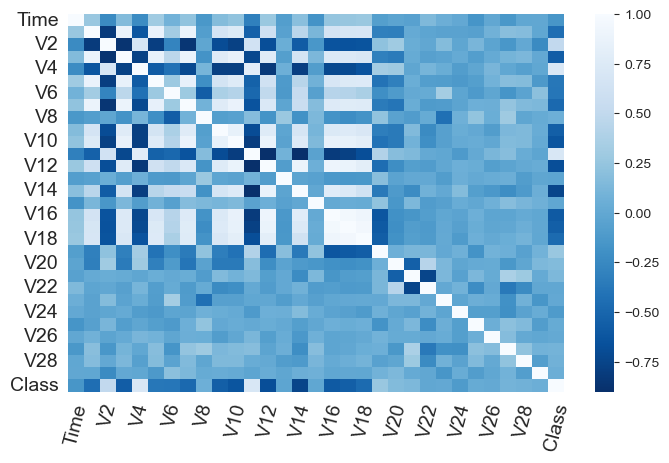

In [195]:
configs_to_plot()
sns.heatmap(df.corr(),cmap='Blues_r');

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.compose import make_column_transformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [210]:
columns_to_scale = x[['Time','Amount']].columns.tolist()
std_s = StandardScaler()
mm_s = MinMaxScaler()
rb_s = RobustScaler()

preprocess = make_column_transformer(
    (rb_s,columns_to_scale )
)

estimator = XGBClassifier()

feature_selection = SelectFromModel(estimator)

steps = [
    ('f_s', feature_selection),
    ('clf', estimator)
]

pip = Pipeline(steps)

param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3,10,1),
    'clf__n_estimators': np.arange(50,250,50)
}

rand_auc = RandomizedSearchCV(estimator=pip, param_distributions=param_grid, n_iter=5, scoring='roc_auc', cv=5, verbose=False)

rand_auc.fit(x_train, y_train)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    steps = [
        ('preprocess', preprocess),
        ('select', fs),
        ('clf', classifier)
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipeline.score(X_test, y_test))

[21:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('f_s',
                                              SelectFromModel(estimator=XGBClassifier(base_score=None,
                                                                                      booster=None,
                                                                                      colsample_bylevel=None,
                                                                                      colsample_bynode=None,
                                                                                      colsample_bytree=None,
                                                                                      enable_categorical=False,
                                                                                      gamma=None,
                                                                                      gpu_id=None,
                                                                                  

In [213]:
rand_auc.best_score_

0.9686490727355844

In [207]:
pip.fit(x_train,y_train)

[20:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('f_s',
                 SelectFromModel(estimator=XGBClassifier(base_score=0.5,
                                                         booster='gbtree',
                                                         colsample_bylevel=1,
                                                         colsample_bynode=1,
                                                         colsample_bytree=1,
                                                         enable_categorical=False,
                                                         gamma=0, gpu_id=-1,
                                                         importance_type=None,
                                                         interaction_constraints='',
                                                         learning_rate=0.300000012,
                                                         max_delta_step=0,
                                                         max_depth=6,
                                           

In [208]:
pip.score(x_test,y_test)

0.943609022556391

In [ ]:
cm = confusion_matrix(modelo.predict(x_test),y_test)
plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3])
print(classification_report(modelo.predict(x_test),y_test))